# Visualization Project: Exploring Drivers of Movie Success


For this project
, I will be working on the **TMDB 5000 Movie Dataset**. The dataset contains 2 csv files as follows :

1. **`tmdb_5000_movies.csv`** – Contains data about the movie as follows:
   - `id`, `title`, `budget`, `revenue`, `runtime`
   - `genres`,
   - `release_date`, `vote_average`, `vote_count`
   - Other descriptive columns like `overview`, `tagline`, `original_language`, `production_companies`, etc.

2. **`tmdb_5000_credits.csv`** – Contains details about the cast crew etc.:
   - `movie_id`, `title`
   - `cast` (JSON string with actors, character names, and order)
   - `crew` (JSON string with directors, producers, and other roles)

## Objective
The goal of this project is to **analyze and visualize factors influencing movie success**, defined in terms of:
- **Revenue** – financial performance
- **Vote Average** – audience reception

We will explore relationships between movie features such as **budget, cast, director, genre, runtime**, and movie success. Visualizations will be used to test hypotheses and uncover hidden patterns.

---
Before we begin with this assignement I would like to make 2 hypotheses based on my knowledge about the film industry. Based on the data we have these may be proved or disproved along the way.

## Hypotheses

### Hypothesis 1 (Popularity vs Ratings)
- Voter average is independent of revenue or budget
- High poularity doesn't always mean better ratings  

---

### Hypothesis 2 (Runtime Effect)
Very long (>180 min) or very short (<80 min) movies tend to have lower ratings.
- Logic: Audience attention spans matter; extremes risk reception.
- Test: Plot runtime bins vs vote_average.



# Importing Libraries 

In [88]:
# Core libraries
import pandas as pd
import numpy as np

import ast

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 1000)


# Data Summary
Before we begin with the data preprocessing it is important to understand the data present in the datasets. Therefore it is best to load, and view the csv files as well as keep track of any missing/ null values which can hinder our visualizations later on.

In [89]:
def summarize_dataframe(df, name="DataFrame"):
    """
    Print a summary of a DataFrame:
    - Shape
    - Column names & data types
    - Missing values count
    - First 5 rows
    
    Parameters:
        df (pd.DataFrame): The DataFrame to summarize
        name (str): Name of the DataFrame (for clarity)
    """
    print(f"\n Summary of {name}")
    print("-" * 50)
    print(f"Shape: {df.shape}\n")
    
    print(" Column Info:")
    print(df.dtypes)
    
    print("\n Missing Values:")
    print(df.isnull().sum())
    
    print("\n First 5 Rows:")
    display(df.head())


In [90]:


# Load movies and credits datasets
movies_df = pd.read_csv("tmdb_5000_movies.csv")
credits_df = pd.read_csv("tmdb_5000_credits.csv")

# Quick check
print("Movies dataset shape:", movies_df.shape)
print("Credits dataset shape:", credits_df.shape)

# Display first 3 rows of each
display(movies_df.head(3))
display(credits_df.head(3))


Movies dataset shape: (4803, 20)
Credits dataset shape: (4803, 4)


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [91]:
summarize_dataframe(movies_df, "Movies Data")
summarize_dataframe(credits_df, "Credits Data")



 Summary of Movies Data
--------------------------------------------------
Shape: (4803, 20)

 Column Info:
budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
dtype: object

 Missing Values:
budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview        

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124



 Summary of Credits Data
--------------------------------------------------
Shape: (4803, 4)

 Column Info:
movie_id     int64
title       object
cast        object
crew        object
dtype: object

 Missing Values:
movie_id    0
title       0
cast        0
crew        0
dtype: int64

 First 5 Rows:


,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


### Handling Missing Values in Key Columns

From the missing value analysis, we observed:  
- **Runtime**: 2 movies have missing values.  
- **Budget & Revenue**: No missing values.  
- **Release Date**: 1 missing value.  
- **Overview**: 3 missing values.  
- **Homepage** and **Tagline** have a large number of missing values, but these are not critical for our analysis.  

Since **runtime** is an important feature for our study, we will identify which movies have missing runtimes. Later, we can decide whether to drop these rows or impute the values (e.g., using median runtime).  


In [92]:
# Drop rows with missing runtime
movies_df = movies_df.dropna(subset=['runtime'])

# Confirm that no missing runtime values remain
movies_df['runtime'].isnull().sum()


np.int64(0)

## Data Transformation

The raw datasets (`movies_df` and `credits_df`) contain several columns with 
nested JSON strings (`genres`, `cast`, `crew`) etc. that must be transformed into 
structured features for analysis.

### Why Transformation is Needed
- **Genres (`movies_df.genres`)**: Stored as a JSON list of dictionaries 
  (e.g., `[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}]`).  
  For hypothesis testing, we need explicit categorical columns such as 
  `primary_genre` and `secondary_genre`.
- **Cast (`credits_df.cast`)**: Stored as a JSON list of dictionaries with 
  actor details. Instead of raw JSON, useful derived features include:
  - `num_cast` – number of credited actors
  - `lead_actor` – the first listed actor (highest billing)
- **Crew (`credits_df.crew`)**: Contains director, producer, etc. For our 
  hypotheses, the **director** is the most relevant, so we extract a 
  `director_name` column.

### Joining the Datasets
Since `movies_df` contains movie metadata (runtime, budget, revenue, ratings, 
etc.) and `credits_df` contains cast/crew information, we must join them to 
have a single comprehensive dataset:
- **Join Key**: `movies_df.id` ↔ `credits_df.movie_id`
- **Join Type**: Inner join (to retain only movies present in both datasets)

### Final Features to Extract
After merging, we will derive new columns:
- `primary_genre`, `secondary_genre`
- `num_cast`
- `lead_actor`
- `director_name`

These transformations will convert semi-structured JSON columns into 
meaningful features suitable for exploratory data analysis and hypothesis 
testing.


In [107]:
import pandas as pd
import ast

# --- Step 1: Merge movies and credits ---
merged_df = movies_df.merge(credits_df, left_on='id', right_on='movie_id', how='inner')

# --- Step 2: Helper functions to parse JSON strings ---
def extract_genres(genre_str):
    try:
        genres = ast.literal_eval(genre_str)
        primary = genres[0]['name'] if len(genres) > 0 else None
        secondary = genres[1]['name'] if len(genres) > 1 else None
        return pd.Series([primary, secondary])
    except:
        return pd.Series([None, None])
        
def extract_genre_list(genre_str):
    try:
        genres = ast.literal_eval(genre_str)
        genre_names = [g['name'] for g in genres]
        return ', '.join(genre_names) if genre_names else None
    except:
        return None


def extract_cast(cast_str):
    try:
        cast = ast.literal_eval(cast_str)
        num_cast = len(cast)
        top_actor = cast[0]['name'] if num_cast > 0 else None
        return pd.Series([num_cast, top_actor])
    except:
        return pd.Series([None, None])

def extract_director(crew_str):
    try:
        crew = ast.literal_eval(crew_str)
        for member in crew:
            if member.get('job') == 'Director':
                return member.get('name')
        return None
    except:
        return None

# --- Step 3: Apply transformations safely ---
merged_df[['primary_genre', 'secondary_genre']] = merged_df['genres'].apply(lambda x: extract_genres(x))
merged_df[['num_cast', 'Lead_actor']] = merged_df['cast'].apply(lambda x: extract_cast(x))
merged_df['director_name'] = merged_df['crew'].apply(lambda x: extract_director(x))
merged_df['genre_list'] = merged_df['genres'].apply(lambda x: extract_genre_list(x))




In [115]:
merged_df[['original_title', 'primary_genre', 'secondary_genre', 
           'num_cast', 'Lead_actor', 'director_name','revenue','budget','popularity','vote_average', 'genre_list']].head()

,original_title,primary_genre,secondary_genre,num_cast,Lead_actor,director_name,revenue,budget,popularity,vote_average,genre_list
0,Avatar,Action,Adventure,83.0,Sam Worthington,James Cameron,2787965087,237000000,150.437577,7.2,"Action, Adventure, Fantasy, Science Fiction"
1,Pirates of the Caribbean: At World's End,Adventure,Fantasy,34.0,Johnny Depp,Gore Verbinski,961000000,300000000,139.082615,6.9,"Adventure, Fantasy, Action"
2,Spectre,Action,Adventure,83.0,Daniel Craig,Sam Mendes,880674609,245000000,107.376788,6.3,"Action, Adventure, Crime"
3,The Dark Knight Rises,Action,Crime,158.0,Christian Bale,Christopher Nolan,1084939099,250000000,112.312950,7.6,"Action, Crime, Drama, Thriller"
4,John Carter,Action,Adventure,27.0,Taylor Kitsch,Andrew Stanton,284139100,260000000,43.926995,6.1,"Action, Adventure, Science Fiction"


In [116]:
summarize_dataframe(merged_df, "Aggregated Data")


 Summary of Aggregated Data
--------------------------------------------------
Shape: (4773, 30)

 Column Info:
budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title_x                  object
vote_average            float64
vote_count                int64
movie_id                  int64
title_y                  object
cast                     object
crew                     object
primary_genre            object
secondary_genre          object
num_cast                float64
Lead_actor             

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,movie_id,title_y,cast,crew,primary_genre,secondary_genre,num_cast,Lead_actor,director_name,genre_list
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",Action,Adventure,83.0,Sam Worthington,James Cameron,"Action, Adventure, Fantasy, Science Fiction"
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",Adventure,Fantasy,34.0,Johnny Depp,Gore Verbinski,"Adventure, Fantasy, Action"
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",Action,Adventure,83.0,Daniel Craig,Sam Mendes,"Action, Adventure, Crime"
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",Action,Crime,158.0,Christian Bale,Christopher Nolan,"Action, Crime, Drama, Thriller"
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",Action,Adventur

# Observations

After extracting key variables from the JSON strings in the dataset, we notice that a few critical columns still contain missing values:

- `director_name` has missing entries
- `primary_genre` has missing entries
- `lead_actor` has missing entries

Since these variables are essential for our hypotheses (e.g., testing the effect of star power, genre, and cast size on movie success), we need to handle these missing values carefully:

1. **Primary Genre:** Drop rows with missing `primary_genre` since genre is critical for most analyses.
2. **Director Name:** Drop rows where the director is unknown, as the director’s influence is part of Hypothesis 1.
3. **Lead Actor:** Drop rows with missing lead actor information to accurately analyze star power effects.

Other columns with missing data (e.g., `overview`, `homepage`, `tagline`) are not used in our hypotheses, so we can ignore or leave them as is.


In [117]:
# Total count of rows in the dataframe
total_rows = movies_df.shape[0]
print("Total rows:", total_rows)

# Alternative way
print("Total rows (using len):", len(movies_df))



Total rows: 4801
Total rows (using len): 4801


In [118]:
(merged_df['title_x'] == merged_df['title_y']).value_counts()


True    4773
Name: count, dtype: int64

In [119]:
# Drop rows where primary_genre is missing (critical feature)
merged_df = merged_df.dropna(subset=['primary_genre'])

# Fill missing secondary_genre with "None"
merged_df['secondary_genre'] = merged_df['secondary_genre'].fillna("None")

# Fill missing top_billed_actor with "Unknown Actor"
merged_df['Lead_actor'] = merged_df['Lead_actor'].fillna("Unknown Actor")

# Fill missing director_name with "Unknown Director"
merged_df['director_name'] = merged_df['director_name'].fillna("Unknown Director")

# Optional: reset index after dropping rows
merged_df = merged_df.reset_index(drop=True)

# Check again for missing values
print(merged_df.isnull().sum())


budget                     0
genres                     0
homepage                3066
id                         0
keywords                   0
original_language          0
original_title             0
overview                   1
popularity                 0
production_companies       0
production_countries       0
release_date               0
revenue                    0
runtime                    0
spoken_languages           0
status                     0
tagline                  817
title_x                    0
vote_average               0
vote_count                 0
movie_id                   0
title_y                    0
cast                       0
crew                       0
primary_genre              0
secondary_genre            0
num_cast                   0
Lead_actor                 0
director_name              0
genre_list                 0
dtype: int64


In [120]:
# Drop rows where top_billed_actor OR director_name is missing
merged_df = merged_df.dropna(subset=["Lead_actor", "director_name"])

# Check shape after dropping
print("Rows after dropping missing lead actors and directors:", merged_df.shape[0])


Rows after dropping missing lead actors and directors: 4773


In [121]:
summarize_dataframe(merged_df, "Aggregated Data")


 Summary of Aggregated Data
--------------------------------------------------
Shape: (4773, 30)

 Column Info:
budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title_x                  object
vote_average            float64
vote_count                int64
movie_id                  int64
title_y                  object
cast                     object
crew                     object
primary_genre            object
secondary_genre          object
num_cast                float64
Lead_actor             

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,movie_id,title_y,cast,crew,primary_genre,secondary_genre,num_cast,Lead_actor,director_name,genre_list
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",Action,Adventure,83.0,Sam Worthington,James Cameron,"Action, Adventure, Fantasy, Science Fiction"
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",Adventure,Fantasy,34.0,Johnny Depp,Gore Verbinski,"Adventure, Fantasy, Action"
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",Action,Adventure,83.0,Daniel Craig,Sam Mendes,"Action, Adventure, Crime"
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",Action,Crime,158.0,Christian Bale,Christopher Nolan,"Action, Crime, Drama, Thriller"
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",Action,Adventur

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_movie_success_pairplot_simple(df):
    """
    Generates a simple pairplot for movie success indicators: budget, revenue, runtime, vote_average.
    
    Parameters:
        df (pd.DataFrame): Merged movie dataset with columns ['budget', 'revenue', 'runtime', 'vote_average'].
    """
    
    # Prepare data
    plot_data = df[['budget', 'revenue', 'runtime', 'vote_average']].copy()
    plot_data = plot_data.replace(0, pd.NA).dropna()  # remove missing/zero values
    
    # Convert to millions for readability
    plot_data['budget_m'] = plot_data['budget'] / 1e6
    plot_data['revenue_m'] = plot_data['revenue'] / 1e6
    
    # Pair plot
    sns.set_theme(style="whitegrid")
    pair = sns.pairplot(
        plot_data[['budget_m', 'revenue_m', 'runtime', 'vote_average']],
        diag_kind=None,
        corner=True,
        plot_kws={"alpha": 0.6, "s": 40, "edgecolor": "w"}
    )
    
    # Short axis labels
    label_map = {
        "budget_m": "Budget (M $)",
        "revenue_m": "Revenue (M $)",
        "runtime": "Runtime (min)",
        "vote_average": "Vote Avg"
    }
    
    for ax in pair.axes.flat:
        if ax is not None:
            if ax.get_xlabel() in label_map:
                ax.set_xlabel(label_map[ax.get_xlabel()])
            if ax.get_ylabel() in label_map:
                ax.set_ylabel(label_map[ax.get_ylabel()])
    
    # Title
    plt.suptitle(
        "Movie Success Indicators\nBudget, Revenue, Runtime, Ratings",
        fontsize=14, y=1.02
    )
    
    plt.show()
    
    print(
        "📊 Pairplot showing correlations between budget, revenue, runtime, and vote average.\n"
        "- Budget and revenue shown in millions.\n"
        "- No log scaling applied.\n"
        
    )


In [123]:
# Ensure 'release_year' column exists
merged_df['release_year'] = pd.to_datetime(merged_df['release_date']).dt.year

# Find the maximum release year
max_year = merged_df['release_year'].max()
print("Maximum release year in the dataset:", max_year)


Maximum release year in the dataset: 2017


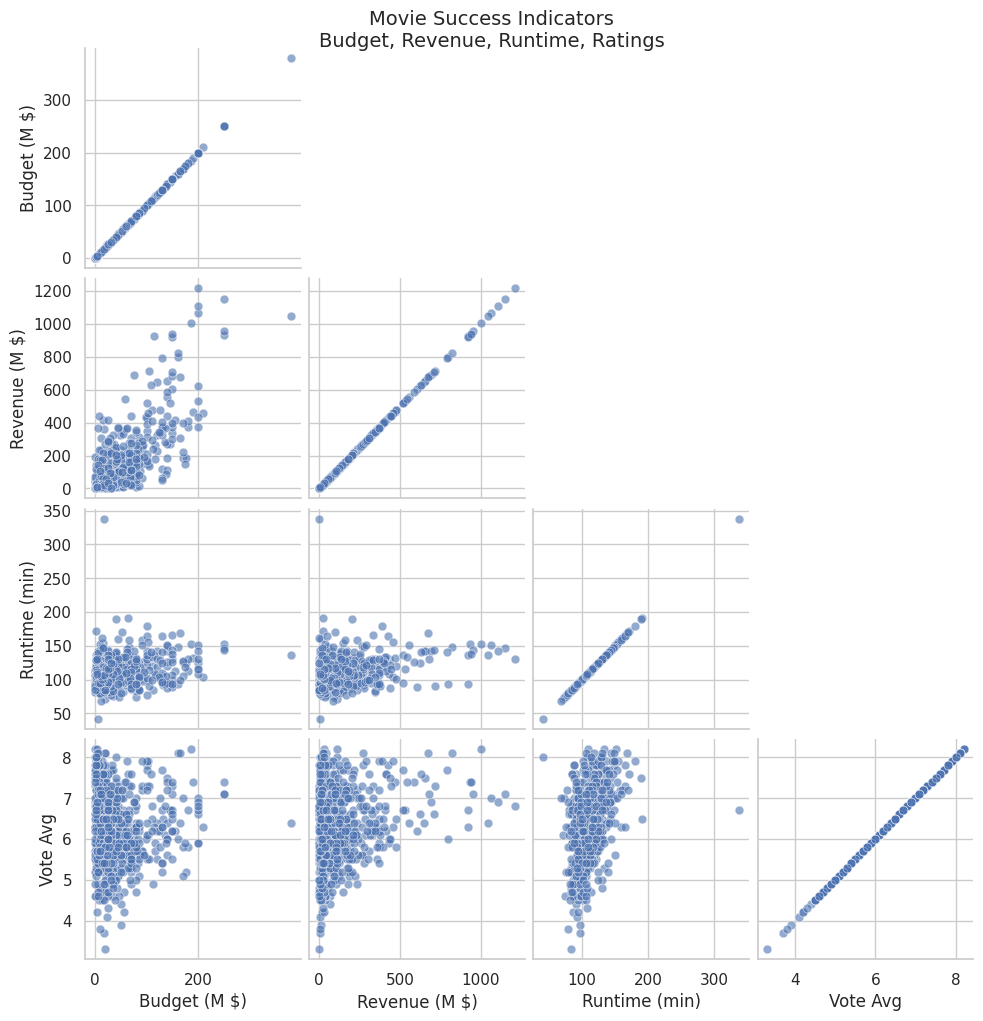

📊 Pairplot showing correlations between budget, revenue, runtime, and vote average.
- Budget and revenue shown in millions.
- No log scaling applied.



In [124]:
plot_movie_success_pairplot_simple(merged_df.sample(1000, random_state=42))


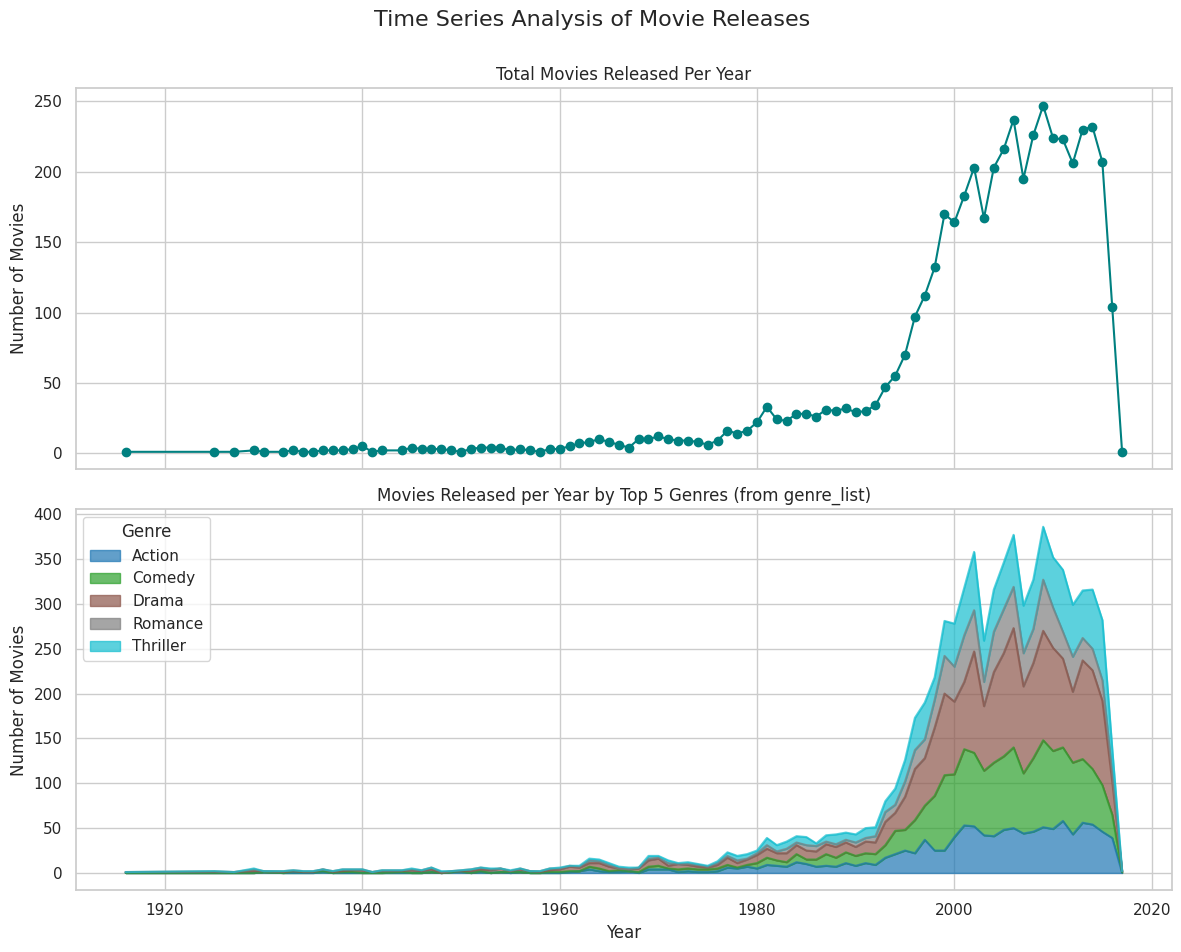

In [125]:
import matplotlib.pyplot as plt
import pandas as pd

# --- Step 1: Extract release year ---
merged_df['release_year'] = pd.to_datetime(merged_df['release_date']).dt.year

# --- Step 2: Total movies per year ---
movies_per_year = merged_df.groupby('release_year').size()

# --- Step 3: Expand genre list into multiple rows ---
genre_expanded = merged_df.dropna(subset=['genre_list']).copy()
genre_expanded['genre_list'] = genre_expanded['genre_list'].str.split(', ')
genre_expanded = genre_expanded.explode('genre_list')

# --- Step 4: Top 5 genres by movie count ---
top_genres = genre_expanded['genre_list'].value_counts().head(5).index.tolist()

# --- Step 5: Movies per year per top genre ---
genre_year_counts = genre_expanded[genre_expanded['genre_list'].isin(top_genres)] \
    .pivot_table(index='release_year', columns='genre_list', aggfunc='size', fill_value=0)

# --- Step 6: Create subplots ---
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Line plot: total movies per year
axes[0].plot(movies_per_year.index, movies_per_year.values, marker='o', color='teal')
axes[0].set_title("Total Movies Released Per Year")
axes[0].set_ylabel("Number of Movies")
axes[0].grid(True)

# Stacked area chart: top 5 genres
genre_year_counts.plot(kind='area', stacked=True, cmap='tab10', alpha=0.7, ax=axes[1])
axes[1].set_title("Movies Released per Year by Top 5 Genres (from genre_list)")
axes[1].set_xlabel("Year")
axes[1].set_ylabel("Number of Movies")
axes[1].legend(title="Genre")

# Main title for both subplots
fig.suptitle("Time Series Analysis of Movie Releases", fontsize=16, y=0.95)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


# Observations

From the time series plot, we notice a sudden drop in the number of movies in **2016** and **2017**. This is likely due to missing data for newly released movies. 

Additionally, we observe that the **Thriller** genre had the greatest number of movies across all years, while the **Action** genre consistently had fewer releases.


In [133]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def revenue_ratings_breakdown(df):
    """
    Creates:
    1. Violin plot for vote_average of top 5 directors by number of movies.
    2. Bar chart comparing average revenue and budget for top 10 genres (from genre_list).
    """
    # --- Violin Plot: Top 5 Directors ---
    top_directors = df['director_name'].value_counts().head(5).index
    top_directors_df = df[df['director_name'].isin(top_directors)]

    plt.figure(figsize=(10, 6))
    sns.violinplot(
        data=top_directors_df,
        x='director_name',
        y='vote_average'
    )
    plt.title("Distribution of Ratings (vote_average) for Top 5 Directors")
    plt.xlabel("Director")
    plt.ylabel("Vote Average")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    # --- Bar Chart: Average Revenue & Budget for Top 10 Genres ---
    # Ensure genre_list is in list format
    df = df.copy()
    df['genre_list'] = df['genre_list'].apply(lambda x: eval(x) if isinstance(x, str) else x)

    # Explode genres into separate rows
    exploded = df.explode('genre_list')

    # Take top 10 most frequent genres
    top_genres = exploded['genre_list'].value_counts().head(10).index
    genre_df = exploded[exploded['genre_list'].isin(top_genres)]

    # Compute average revenue & budget
    avg_stats = genre_df.groupby('genre_list')[['revenue', 'budget']].mean()

    # Plot
    fig, ax = plt.subplots(figsize=(12, 6))
    width = 0.35
    x = range(len(avg_stats))

    ax.bar(x, avg_stats['revenue']/1e6, width=width, label='Revenue (M USD)', color='skyblue')
    ax.bar([i + width for i in x], avg_stats['budget']/1e6, width=width, label='Budget (M USD)', color='salmon')

    ax.set_xticks([i + width/2 for i in x])
    ax.set_xticklabels(avg_stats.index, rotation=45, ha='right')
    ax.set_xlabel("Genre")
    ax.set_ylabel("Amount (Million USD)")
    ax.set_title("Average Revenue vs Budget by Top 10 Genres")
    ax.legend()
    plt.tight_layout()
    plt.show()


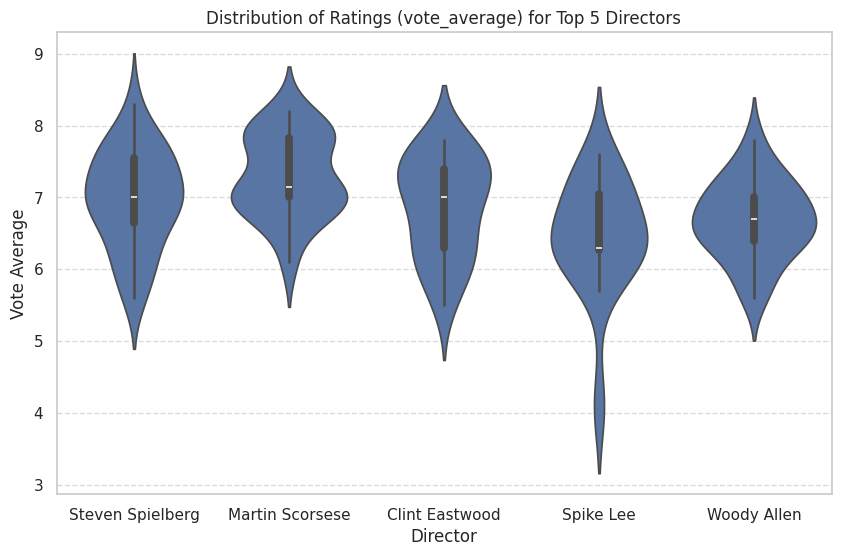

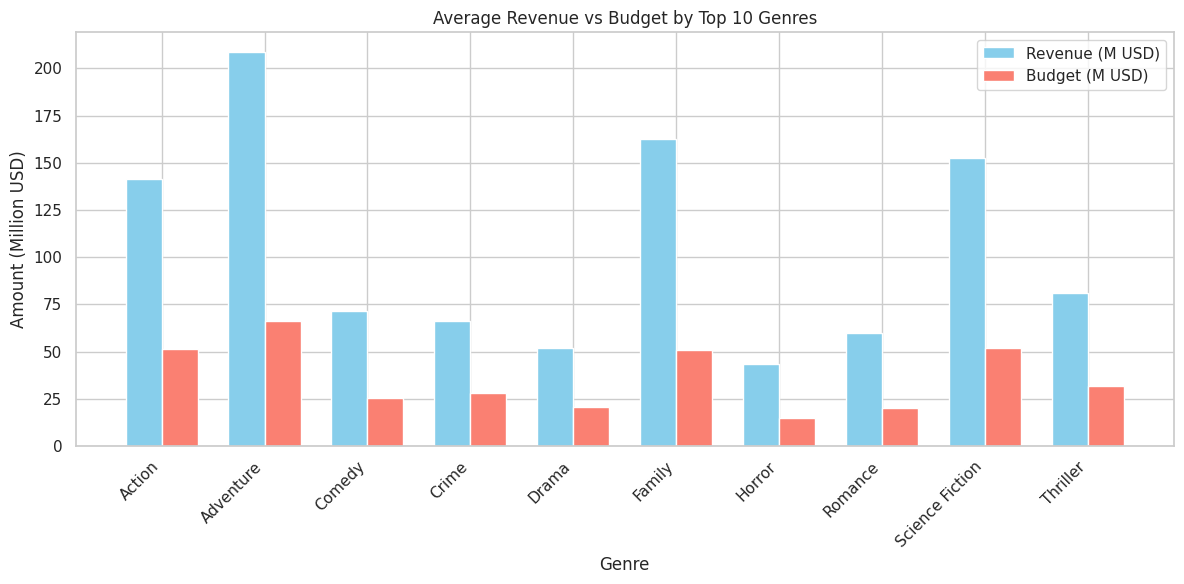

In [134]:
revenue_ratings_breakdown(merged_df)


In [146]:
import matplotlib.pyplot as plt
import seaborn as sns

def correlation_heatmap(df):
    """
    Generates a clean correlation heatmap for key numerical variables in the dataframe.
    """
    # Select only meaningful numerical columns
    numeric_cols = merged_df.select_dtypes(include=['number']).columns.tolist()
    numeric_cols.remove('movie_id')
    numeric_cols.remove('id')
    numeric_cols.remove('release_year')
    # Compute correlation matrix
    corr_matrix = df[numeric_cols].corr()
    
    # Plot
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        corr_matrix,
        annot=True,
        fmt=".2f",
        cmap='coolwarm',
        square=True,
        cbar_kws={'label': 'Correlation'}
    )
    plt.title("Correlation of Key Numerical Movie Attributes")
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()


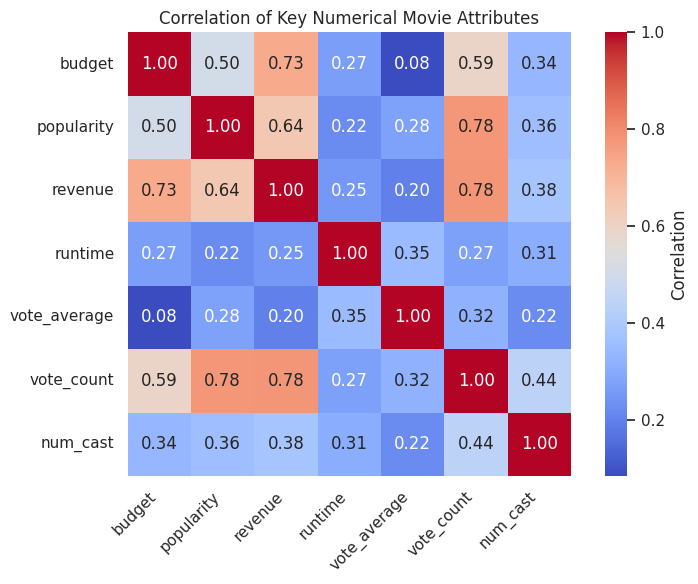

In [147]:
correlation_heatmap(merged_df)


### Additional Observation: Runtime by Genre(Bownie question)

To further enrich our analysis, we visualized **film runtime across different genres**.  

The results highlight clear distinctions:  
- **Animation films** tend to have **shorter runtimes**, which is expected given their target audience (often children) and the high production costs associated with animation.  
- **Historical and epic films** display the **longest median runtimes**, reflecting their need for extensive storytelling, character development, and world-building.  
- Other genres such as **drama** and **action** fall in between, with moderate runtimes balancing narrative depth and audience engagement.

---

### Insight
This genre-wise breakdown suggests that **runtime is not only a function of budget or quality but also heavily influenced by the genre’s storytelling requirements and audience expectations**.  
For instance, while animated films succeed despite shorter runtimes, historical films may rely on extended runtimes to convey depth and complexity.  


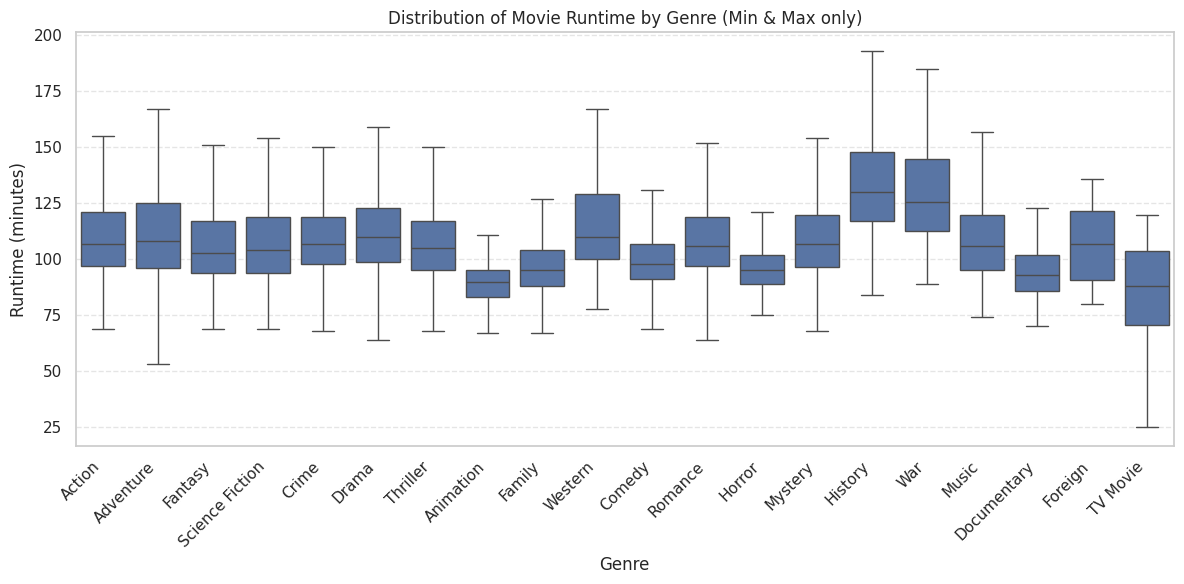

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns

def runtime_by_genre_box(df):
    """
    Creates a box plot showing the distribution of movie runtimes by genre_list,
    without plotting individual outlier points.
    """

    # Safe parsing of genre_list
    def parse_genres(x):
        if isinstance(x, list):
            return x
        elif isinstance(x, str):
            return [g.strip() for g in x.split(",")]
        else:
            return []

    # Ensure genre_list column is a list
    df['genre_list'] = df['genre_list'].apply(parse_genres)

    # Explode so each row has one genre
    exploded = df.explode('genre_list')

    # Drop rows with missing values
    exploded = exploded.dropna(subset=['genre_list', 'runtime'])

    # Plot
    plt.figure(figsize=(12, 6))
    sns.boxplot(
        x='genre_list',
        y='runtime',
        data=exploded,
        showfliers=False,   # hides outlier points
        palette=None        # removes palette warning
    )
    
    plt.title("Distribution of Movie Runtime by Genre (Min & Max only)")
    plt.xlabel("Genre")
    plt.ylabel("Runtime (minutes)")
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


# Call the function
runtime_by_genre_box(merged_df)


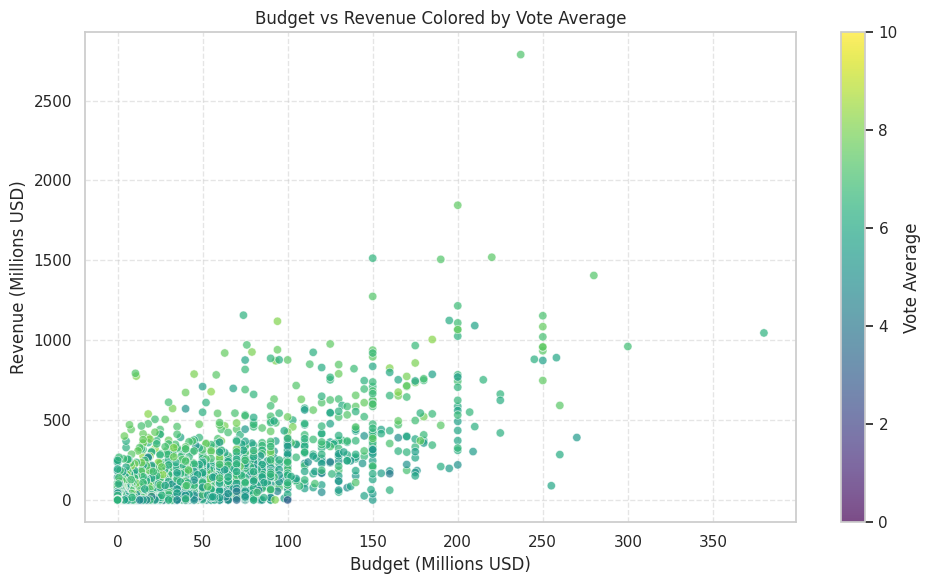

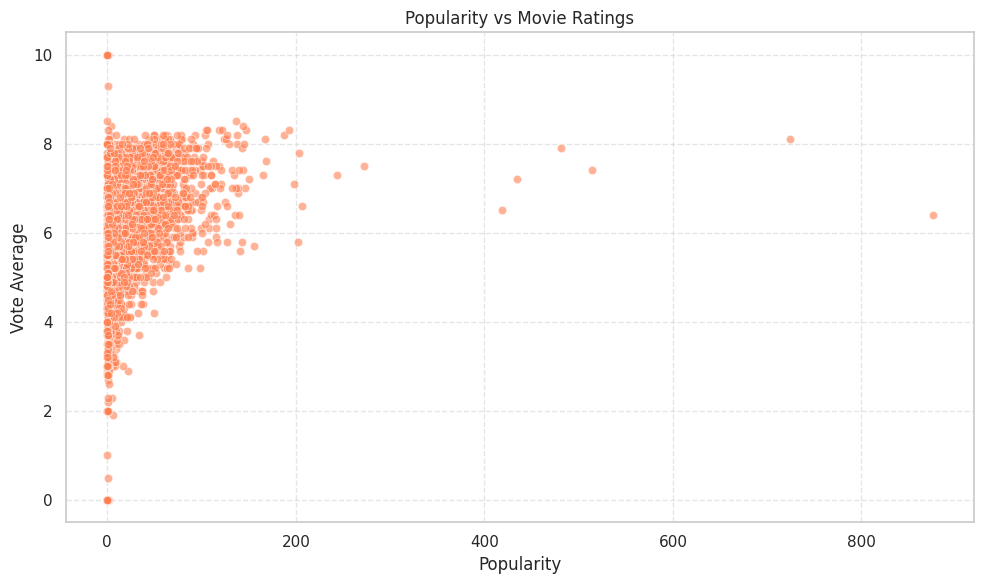

Correlation Matrix (Budget, Revenue, Ratings, Popularity):
                 budget   revenue  vote_average  popularity
budget        1.000000  0.730321      0.083712    0.503963
revenue       0.730321  1.000000      0.197618    0.644022
vote_average  0.083712  0.197618      1.000000    0.275368
popularity    0.503963  0.644022      0.275368    1.000000


In [42]:
# --- Hypothesis 1: Star Power vs Budget ---
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Step 0: Precompute additional features ---
# Top-billed actor is already in merged_df['top_billed_actor']
# Director is in merged_df['director_name']
# Profit = revenue - budget
merged_df['profit'] = merged_df['revenue'] - merged_df['budget']

# --- Step 1: Director vs Ratings ---
# Get top 5 directors by number of movies


# --- Step 3: Budget vs Revenue (with ratings as color) ---
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    merged_df['budget']/1e6,  # budget in millions
    merged_df['revenue']/1e6, # revenue in millions
    c=merged_df['vote_average'], 
    cmap='viridis',
    alpha=0.7,
    edgecolors='w',
    linewidth=0.5
)
plt.title("Budget vs Revenue Colored by Vote Average")
plt.xlabel("Budget (Millions USD)")
plt.ylabel("Revenue (Millions USD)")
cbar = plt.colorbar(scatter)
cbar.set_label("Vote Average")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# --- Step 4: Popularity vs Ratings ---
plt.figure(figsize=(10, 6))
plt.scatter(
    merged_df['popularity'], 
    merged_df['vote_average'], 
    alpha=0.6, edgecolors='w', linewidth=0.5, color='coral'
)
plt.title("Popularity vs Movie Ratings")
plt.xlabel("Popularity")
plt.ylabel("Vote Average")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# --- Step 5: Summary statistics ---
director_corr = merged_df[['budget', 'revenue', 'vote_average', 'popularity']].corr()
print("Correlation Matrix (Budget, Revenue, Ratings, Popularity):\n", director_corr)


## Observations and Conclusions for Hypothesis 1

### Plot 1: Budget vs Revenue vs Vote Average
From the first scatterplot, we observe a clear positive correlation between **budget** and **revenue**.  
In general, films with higher budgets tend to generate higher revenues, although there are several outliers where high-budget films underperform or low-budget films achieve significant success.  

However, the **vote average** (ratings) appears largely independent of both budget and revenue.  
This indicates that financial investment alone does not guarantee audience approval or critical acclaim.  
Thus, the hypothesis is supported — revenue depends not only on the budget but also on the **quality and reception** of the film.

---

### Plot 2: Popularity vs Vote Average
The second scatterplot further strengthens this point.  
We notice that **popularity** (measured by audience engagement and visibility) does not directly correspond to **vote average** (ratings).  
For instance, some films with very low popularity scores still achieve a perfect rating of 10, while certain moderately popular films receive relatively poor ratings.  

This suggests that while popularity may affect a film’s visibility and revenue potential, it does not necessarily reflect the critical quality of the movie.  

---

### Conclusion
Both plots together highlight that:  
- **Budget influences revenue**, but does not guarantee high ratings.  
- **Popularity and ratings are independent**, meaning a movie can be popular without being critically acclaimed, and vice versa.  

Therefore, Hypothesis 1 holds true — the success of a movie cannot be explained solely by budget or popularity; **quality and audience perception play a decisive role**.


In [51]:
# Create runtime categories
def categorize_runtime(runtime):
    if runtime < 80:
        return 'Short (<80 min)'
    elif runtime <= 150:
        return 'Medium (80-150 min)'
    else:
        return 'Long (>150 min)'

merged_df['runtime_category'] = merged_df['runtime'].apply(categorize_runtime)


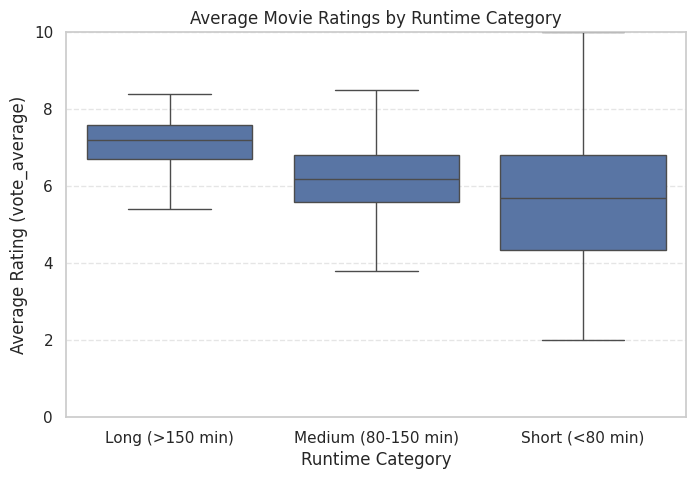

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(
    x='runtime_category',
    y='vote_average',
    data=merged_df,
    showfliers=False  # remove the dots
)

plt.title("Average Movie Ratings by Runtime Category")
plt.xlabel("Runtime Category")
plt.ylabel("Average Rating (vote_average)")
plt.ylim(0, 10)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


## Observations and Conclusions for Hypothesis 2

### Boxplot: Runtime vs Ratings
Contrary to our initial hypothesis, the boxplot reveals that **longer films tend to have higher ratings** on average.  
Surprisingly, **medium-length and short films** display a lower median rating compared to longer films.  

Additionally, the **lowest-rated movies** are predominantly short films.  
This could be attributed to factors such as:  
- **Lower budgets** typically associated with shorter films.  
- **Reduced narrative depth**, since shorter runtimes may limit character development or storytelling complexity.  
- **Audience perception**, where viewers may associate longer films with higher production value and richer content.

---

### Conclusion
Overall, the results suggest that **runtime does have an influence on ratings**, but not in the expected direction.  
Longer films are generally better received, while shorter films are more prone to lower ratings.  

This indicates that **runtime can indirectly reflect film quality or budget**, making it a possible but not absolute predictor of audience ratings.
